In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the Data

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Feature engineering, data cleaning

In [7]:
df.drop(['id','zipcode','lat','long'],axis=1,inplace=True)

In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [34]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
date_yr          0
renovated        0
dtype: int64

No missing data

Grabbing Year of the date

In [10]:
df['date_yr'] = df['date'].apply(lambda x: str(x)[:4])
df.drop('date',axis=1,inplace=True)

In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_yr
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,2015


<h1>Correlation of columns</h1>

<AxesSubplot:>

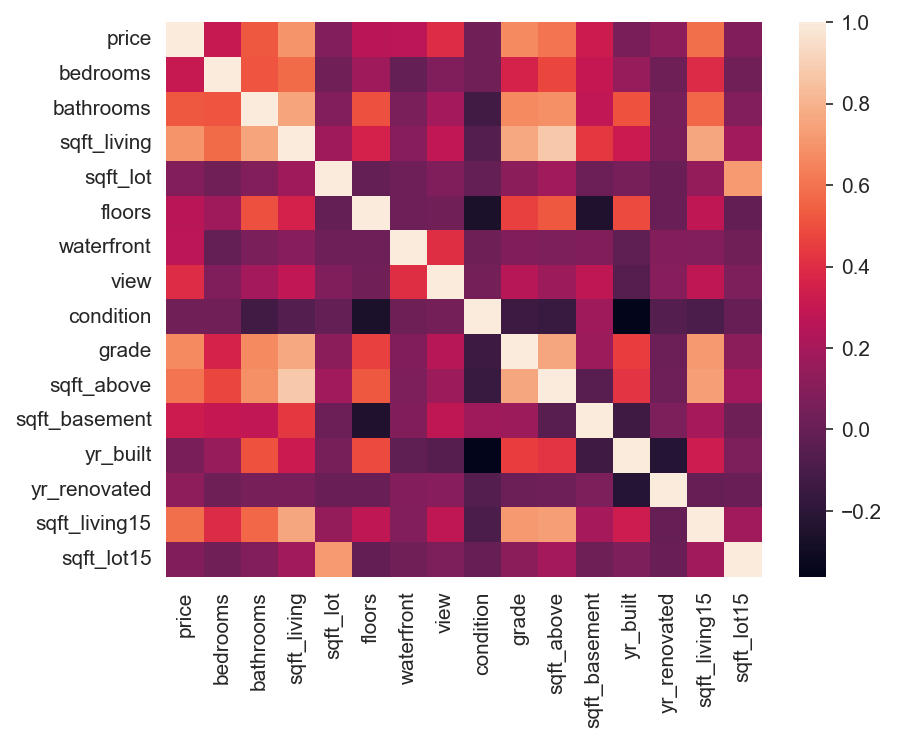

In [12]:
plt.figure(dpi=150)
sns.heatmap(df.corr())

In [13]:
corr_df = df.corr()['price'].sort_values().iloc[:-1]

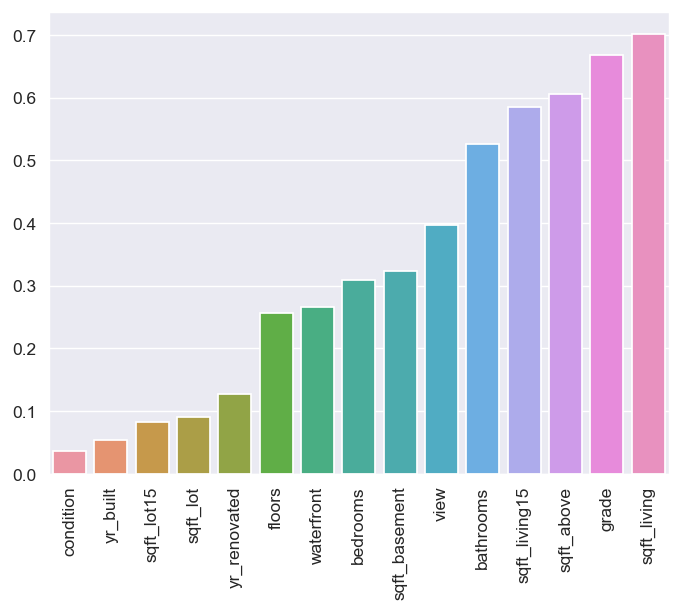

In [14]:
plt.figure(dpi=125)
sns.barplot(x=corr_df.index,y=corr_df.values)
plt.xticks(rotation=90);

Condition,yr_built,sqft_lot15,sqft_lot,yr_renovated have all around 0.1 correlation with price which is very low we could get rid of these columns if we want to speed up our model later

<h1>Dealing with outliers from most correlated columns</h1>

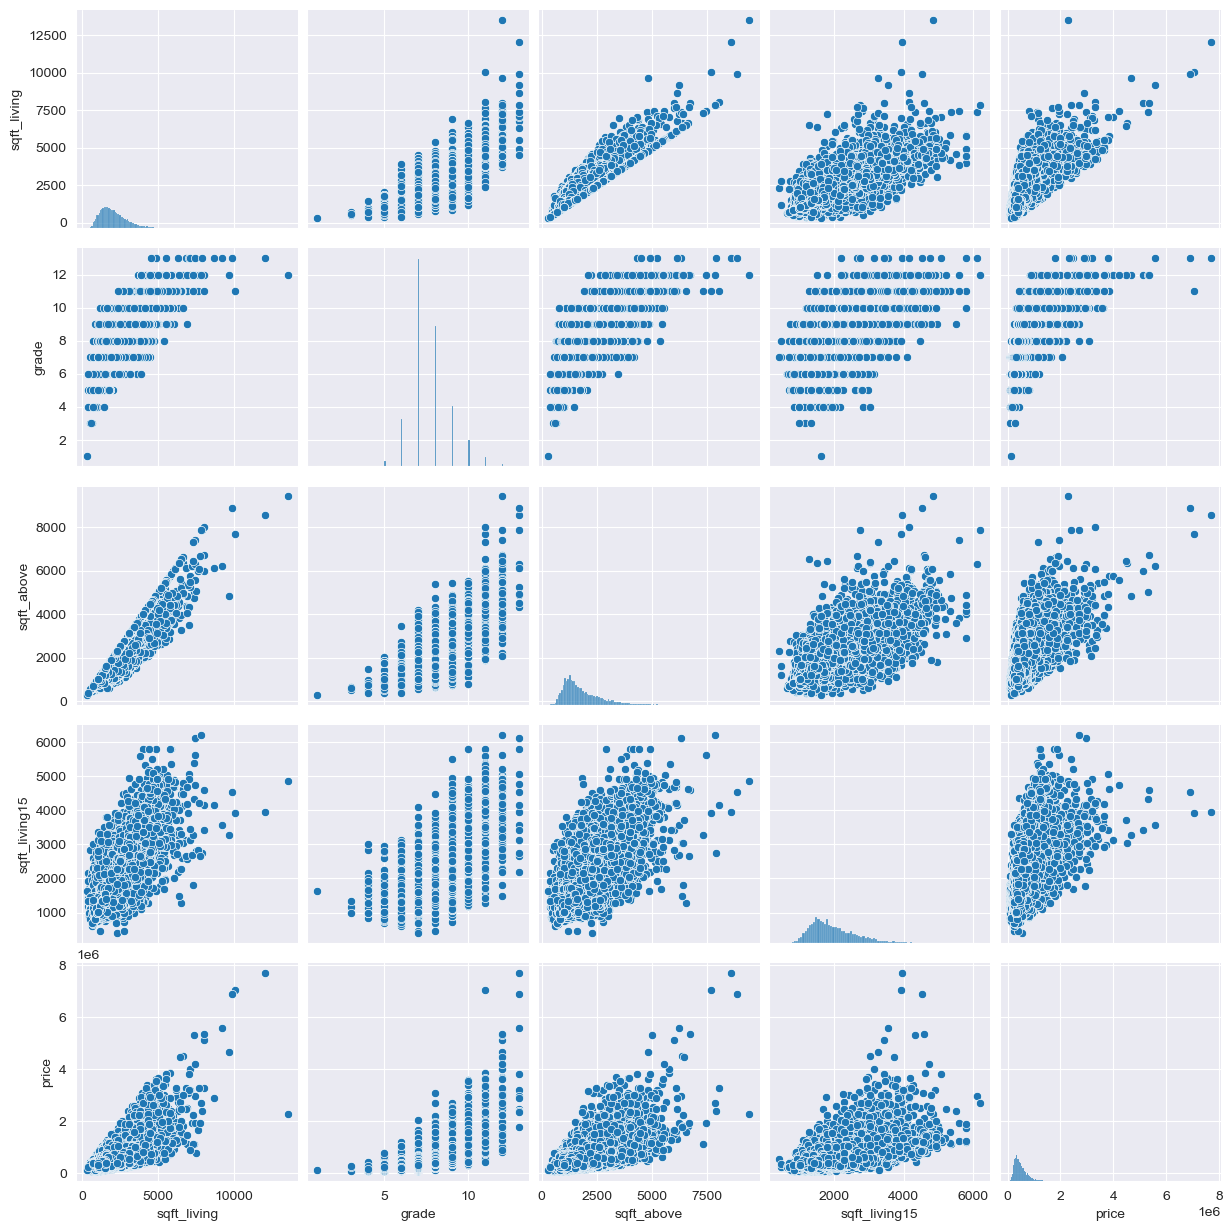

In [15]:
sns.pairplot(df[['sqft_living','grade','sqft_above','sqft_living15','price']])

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

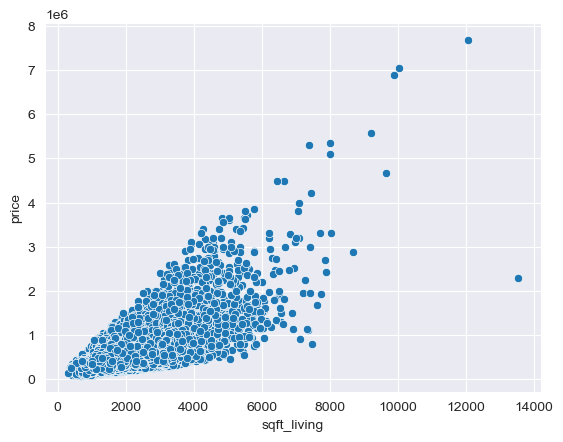

In [16]:
sns.scatterplot(data=df,x='sqft_living',y='price')

In [17]:
df.drop(df[df['sqft_living'] >= 8000].index,inplace=True)

<AxesSubplot:xlabel='grade', ylabel='count'>

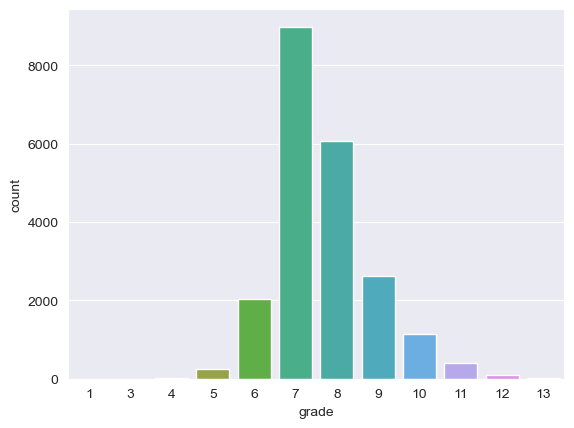

In [18]:
sns.countplot(data=df,x='grade')

Removing grades which only occur a few times

In [19]:
remove = list(df['grade'].value_counts().sort_values()[:4].index)
remove

[1, 3, 13, 4]

In [20]:
df.drop(df[df['grade'].isin(remove)].index,inplace=True)

Deleting outlier from sqft_above

<AxesSubplot:ylabel='sqft_above'>

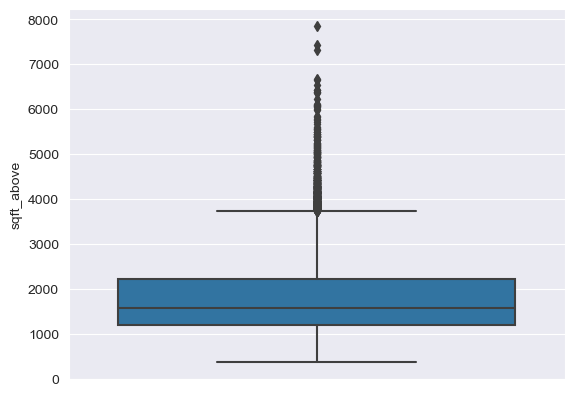

In [21]:
sns.boxplot(data=df,y='sqft_above')

In [22]:
df.drop(df[df['sqft_above'] > 7000].index,inplace=True)

<AxesSubplot:ylabel='sqft_living15'>

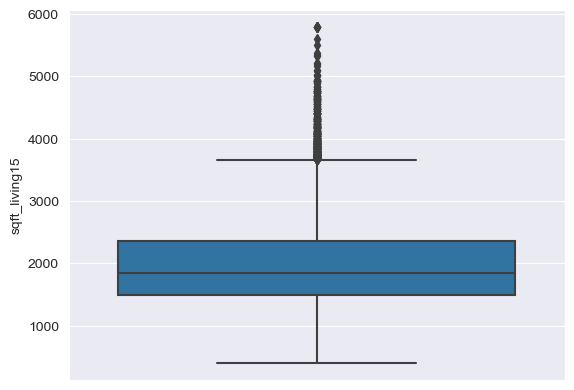

In [23]:
sns.boxplot(data=df,y='sqft_living15')

In [24]:
sum(df['bathrooms'] == 0)

7

In [25]:
df.drop(df[df['bathrooms']==0].index,inplace=True)

Removing houses with 0 bathrooms

<h1>Checking other possible patterns</h1>

<AxesSubplot:xlabel='view', ylabel='price'>

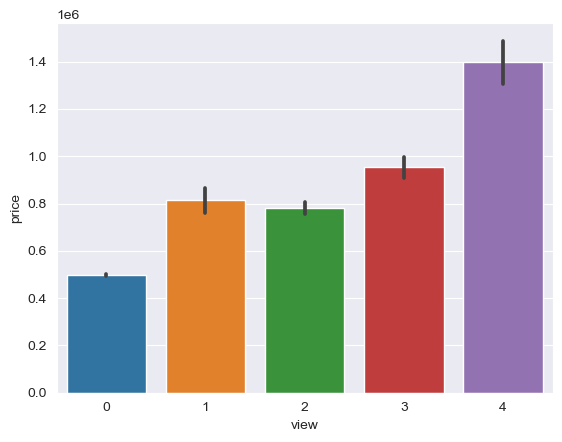

In [26]:
sns.barplot(data=df,x='view',y='price')

Houses with view of 4 have way higher price compared to other possible view values

<AxesSubplot:xlabel='condition', ylabel='price'>

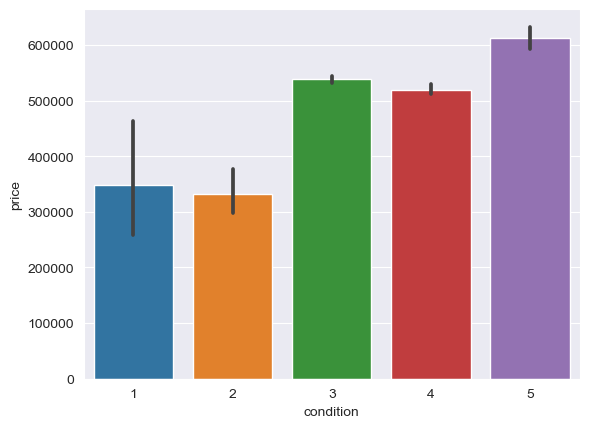

In [27]:
sns.barplot(data=df,x='condition',y='price')

Houses with condition >= 3 have higher mean price

In [28]:
sum(df['yr_renovated'])

1812204

Many houses have not been renovated so we can just group houses to 2 classes renovated and not renovated ignoring when the renovation happened

In [29]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x!=0 else 0)

In [30]:
df.drop('yr_renovated',axis=1,inplace=True)

<AxesSubplot:xlabel='renovated', ylabel='price'>

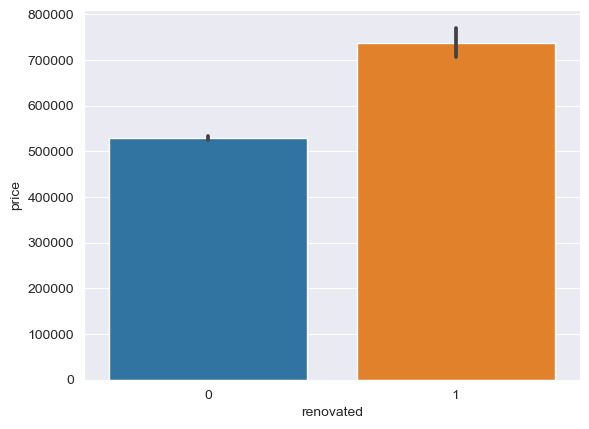

In [31]:
sns.barplot(data=df,x='renovated',y='price')

we see that if a building was renovated the price of it will be higher

In [32]:
df['floors'].value_counts()

1.0    10644
2.0     8223
1.5     1908
3.0      611
2.5      158
3.5        7
Name: floors, dtype: int64

In [33]:
df.drop(df[df['floors'] == 3.5].index,inplace=True)

Removing houses with floors 3.5 which we have only 7 records of in the dataset